<a href="https://colab.research.google.com/github/Parth-Salian/14_days_challenge/blob/parth/Salian/Day3/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> `Check the presentation for logistic regression before moving on to the implementation part` 

In [ ]:
## Logistic Regression implementation

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
## Let's create a small sample dataset on classification (contains binary outcome)
age=[23,18,27,16,40,29,24,21,34,32]
employ=['employed','unemployed','employed','unemployed','employed','employed','unemployed','unemployed','employed','employed']
salary=[100000,0,10000,0,4000000,1500000,0,0,500000,2000000]
buy=[1,1,0,0,0,1,1,1,0,1]

## It contains 4 columns, age,salary, employment type and last column being whether the person bought a laptop or not. (1- Yes, 0- No)

df=pd.DataFrame(
    {
        'age':age,
        'employment_type':employ,
        'salary':salary,
        'buy':buy
    }
)

## Here we are processing the categorical variables ('employed' and 'unemployed') to numerical values. 
employment = pd.get_dummies(df['employment_type'], drop_first = True)
df = pd.concat([df, employment], axis = 1)
df.drop(['employment_type'], axis = 1, inplace = True)

In [ ]:
df.head() # Displays the first 5 rows of the dataset

,age,salary,buy,unemployed
0,23,100000,1,0
1,18,0,1,1
2,27,10000,0,0
3,16,0,0,1
4,40,4000000,0,0


> - Now we want to predict whether a person is likely to buy a laptop or not on the basis of their age, salary and employment type.
- Hence we store the column we want to predict in y and the rest of the dependent features in x








In [ ]:
## y_data is for the single column we want to predict while x_data consists of the dependant variables (hence we remove the column 'buy' from it)
y_data = df['buy'] 
x_data = df.drop('buy', axis = 1)

> Now, we split our dataset into training and testing data in the ratio if 7:3


---

> ```What is Train/Test split?```
- `Training data`: It is the set of data that is used to train and make the model learn the hidden features/patterns in the data.
- `Testing data`: The test set is a separate set of data used to test the model after completing the training.
<br></br>

> <img src="https://miro.medium.com/max/656/0*FKrWuLRbB_MiEIKh" height=300 width=300></img>

---
>- To know more on train-test split [click here]( https://www.youtube.com/watch?v=fwY9Qv96DJY)

In [ ]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3) 
# Test size is 0.3 since 30% of the data is kept for testing our model's accuracy

### Now using sklearn library we define our logistic regression model. 
*`Scikit-learn` is a free machine learning library for Python. It features various algorithms like support vector machine, random forests, and k-neighbours, and it also supports Python numerical and scientific libraries like NumPy and SciPy*

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### We train the our model using our x and y training data.
> We use our trained model to predict the values of our test data (x_test_data) and store it.

*`fit()` : It is used for model fitting. Fitting is basically equal to training. Then, after it is trained, the model can be used to make predictions, usually with a .predict() method call.*

In [ ]:
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

> Now we create a confusion matrix to test the accuracy of our model
- **Confusion matrix** is used for *classfication* problems, to check the number of correct/incorrect predictions.
-It is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm
<br></br>
- <img src="https://miro.medium.com/max/667/1*3yGLac6F4mTENnj5dBNvNQ.jpeg"
height=300 width=350></img>

In [ ]:
from sklearn.metrics import confusion_matrix
print (confusion_matrix(y_test_data,predictions))

[[0 2]
 [1 0]]




---


>- As shown above 
- ``` True positives ``` : 1
- ```True negatives```: 2
- Since there are no false positives/negatives the accuracy of our model is 100%
- This is usually `NOT` the case. It is very unlikely to achieve a 100% accuracy for a larger dataset with realistic values. 

> Now we will plot a graph of logistic regression that represents the relation between age and whether a person will buy a laptop or not. 

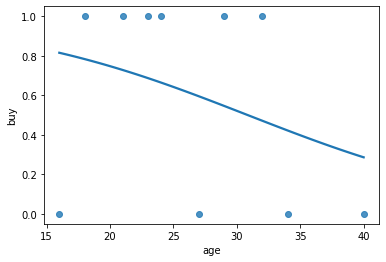

In [ ]:
import seaborn as sns
sns.regplot(x=x_data['age'], y=y_data, data=df, logistic=True, ci=None)

- As shown in the graph, a curve is formed to seperate the 2 outcomes of our dataset.
- As depicted by the curve, ages between 15-30 are more likely to buy a new laptop
> This graph is often used to find how a feature is dependent on the value we need to predict.